# Analysis of Groups Disproporinately impacted by COVID-19

## Background
#### COVID is a respiratory illness is spread through droplet-based transmission and leads to severe respiratory problems, kidney failure, and in some cases death. It is commonly known that people with certain medical conditions and specific age categories are at an increased risk for severe disease following exposure to COVID-19. However, the impact of race, geographic location, economic status, etc. is not often acknowledged. According to the CDC, "Long-standing systemic health and social inequities have put many people from racial and ethnic minority groups at increased risk of getting sick and dying from COVID-19"(CDC.gov). Some of the factors that may contribute to this increased risk could include racial discrimination, healthcare access, educational gaps, income gaps, and wealth gaps. This is an instance that brings forward the idea of health care disparities, which are differences among health and health care between various population groups. For example, "In the U.S. African Americans are contracting SARS-CoV-2 at higher rated and are more likely to die from COVID-19"(Del Rio 2020).


Citations:
https://www.cdc.gov/coronavirus/2019-ncov/community/health-equity/race-ethnicity.html
https://www.cdc.gov/mmwr/volumes/69/wr/mm6933e1.htm
https://www.contagionlive.com/view/covid19-and-its-disproportionate-impact-on-racial-and-ethnic-minorities-in-the-united-states
https://www.usatoday.com/story/money/2020/07/21/how-covid-19-has-disproportionately-affected-minority-communities-in-every-state/41764053/

## This Project Aims to:
#### Examine what factors influence the disproportionate outcomes of COVID-19 and better understand which populations are impacted?

## How Will this be Achived: 
#### Unit of Analysis
- COVID-19 Hotspots across the United States
- Population present in those locations
#### List of potential variables to use in analysis
- Case Load
- Death rate
- Race/ Ethnicity
#### Visualization Techniques to Use:
- Summary statistics to give a brief description of each variable
- Scatter plots and bar charts to help visualize the data more effectively

##### In order to answer these questions, I will use these sources for data collection:

- COVID data: https://github.com/nytimes/covid-19-data
    - Time series data: US.csv: 440 rows, 3 columns, 10.6KB
    - Geographic distribution data: US-states.CSV: 19650 rows, 5 columns, 654KB
- Demographic data from the U.S. Census Bureau: https://www.census.gov/quickfacts/fact/table/FL,NJ,TX,CA,NY,US/RHI625219#RHI625219
    - Race distribution national+ state: Census_Race_Facts.csv: 10 rows, 7 columns, 0.6KB
- Demographic data from the CDC: https://data.cdc.gov/NCHS/Provisional-Death-Counts-for-Coronavirus-Disease-C/pj7m-y5uh
    - US COVID death distribution by race: Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19___Distribution_of_Deaths_by_Race_and_Hispanic_Origin.csv: 212 rows 13 colummns, 31.5KB

In [ ]:
#Import libaries needed to clean/ visualize the data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Understading the Case Load and Death Rates:

In [ ]:
#Import the US csv as a pandas dataframe and define the columns
# This data set was retrived from git hub https://github.com/nytimes/covid-19-data
df1 = pd.read_csv('us.csv')

# Variable definitions: 
- date: starting January 21st, 2020 to October 21st 2020 when it was downloaded
- cases: The total number of cases of Covid-19, including both confirmed and probable
- deaths: The total number of deaths from Covid-19, including both confirmed and probable.

In [ ]:
# find the length of the data frame to see the scale of data that we are working with
len(df1)

439

In [ ]:
# preview the data frame
df1

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
434,2021-03-30,30416970,550500
435,2021-03-31,30485232,551638
436,2021-04-01,30562856,552593
437,2021-04-02,30631700,553554


In [ ]:
# function to plot a graph
def plot_df(df, x, y, title="", xlabel='Date', ylabel='cases', dpi=100):
    plt.figure(figsize=(200,50), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
# Plot of all cases over time
plot_df(df1, x= df1.date, y=df1.cases, title='Time series coronavirus cases data Fig 1.1')  

In [ ]:
#Plot of all deaths over time
plot_df(df1, x= df1.date, y=df1.deaths, title='Time series coronavirus deaths data Fig. 1.2')  

#### Analysis of Time series data by month

In [ ]:
# use the date time function to convert the date strings to dates for easier manipulation
df1["date"]= pd.to_datetime(df1["date"])

In [ ]:
# create a new column for year 
df1['year'] = df1['date'].dt.year

In [ ]:
# create a new column for month
df1['month'] = df1['date'].dt.month

In [ ]:
# create a new column for day 
df1['day'] = df1['date'].dt.day

In [ ]:
# sort and group the sum of cases by year and month
df2= df1.groupby(['year','month'])['cases'].agg('sum')

In [ ]:
# Preview the new data frame
df2

year  month
2020  1               41
      2              736
      3          1095533
      4         19611702
      5         45452104
      6         65288844
      7        111626136
      8        166758784
      9        199758742
      10       252794016
      11       338933940
      12       526007307
2021  1        729974348
      2        773598131
      3        916977364
      4         91890097
Name: cases, dtype: int64

Text(0.5, 0.98, 'Covid-19 Cases Over-time Fig 1.3')

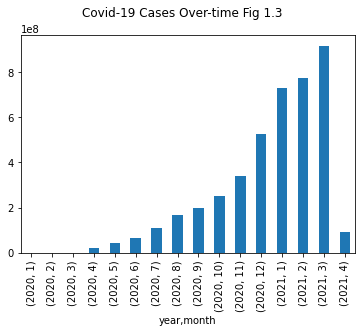

In [ ]:
# plot the data frame as a bar chart
df2.plot(kind="bar",x="(Year,Month)",y="Cases")
plt.suptitle('Covid-19 Cases Over-time Fig 1.3')

In [ ]:
# sort and group the sum of deaths by year and month
df3= df1.groupby(['year','month'])['deaths'].agg('sum') 

In [ ]:
# Preview the new data frame
df3

year  month
2020  1               0
      2               1
      3           20322
      4          990495
      5         2695260
      6         3498954
      7         4307836
      8         5259819
      9         5879775
      10        6774225
      11        7449571
      12        9537613
2021  1        12216241
      2        13511297
      3        16598509
      4         1660449
Name: deaths, dtype: int64

Text(0.5, 0.98, 'Covid-19 Deaths Over-time Fig 1.4')

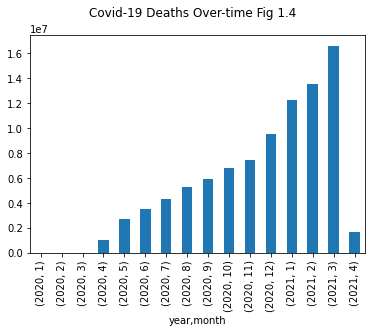

In [ ]:
# plot the new data frame as a bar chart 
df3.plot(kind="bar",x="(Year,Month)",y="Deaths")
plt.suptitle('Covid-19 Deaths Over-time Fig 1.4')

## Analysis of COVID-19 Cases v.s. Deaths: 
##### As expected, there is a positive correlation between coronavirus cases and deaths seen in Fig 1.3

Text(0.5, 0.98, 'COVID-19 Deaths V.S. Cases Fig 1.5')

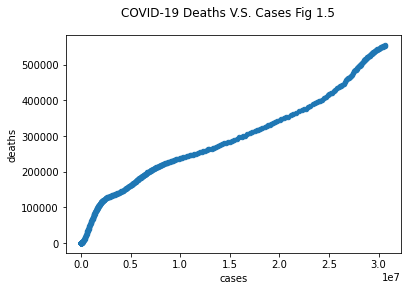

In [ ]:
# plot sum of cases v.s. sum of deaths 
df1.plot(kind='scatter',x="cases",y="deaths")
plt.suptitle('COVID-19 Deaths V.S. Cases Fig 1.5')

# Geographic Distribution of COVID-19 Cases and Deaths

In [ ]:
# import ny times states data
df_Covid = pd.read_csv('us-states.csv', header=None)
df_Covid.columns = ["date","state","fips","cases","deaths"]

# Variable definitions: 
- state: included in the united states and its surrounding territories
- fips: Federal Infomation processing standard codes that identify unique geographic regions

In [ ]:
# find the length of data set
len(df_Covid) 

21850

In [ ]:
# Preview data frame
df5 = df_Covid[1:]
df5.head()

,date,state,fips,cases,deaths
1,2020-01-21,Washington,53,1,0
2,2020-01-22,Washington,53,1,0
3,2020-01-23,Washington,53,1,0
4,2020-01-24,Illinois,17,1,0
5,2020-01-24,Washington,53,1,0


In [ ]:
# convert each value in the cases and deaths column to integers
df5['cases'] = df5['cases'].astype(int)
df5['deaths']= df5['deaths'].astype(int)

In [ ]:
# create a dataframe from df1 which sums the deaths and cases in each state. 
sum_df= df5.groupby('state')["cases","deaths"].agg(['sum'])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
# create another data frame focused on the sum of all Coronavirus Cases and Deaths
df6= df5.groupby(['state']).sum().reset_index()
df6

,state,cases,deaths
0,Alabama,75841306,1319866
1,Alaska,8065944,37877
2,Arizona,118206048,2371771
3,Arkansas,46505639,751151
4,California,486096999,7337698
5,Colorado,61907718,1083587
6,Connecticut,41707199,1796347
7,Delaware,12709541,264113
8,District of Columbia,7219338,235424
9,Florida,304886271,5288038


# Top 5 states by Total Coronavirus Cases:
1. California
2. Texas
3. Florida
4. New York 
5. Illinois

In [ ]:
# sort the cases from least to greatest to determine the top5 states based on sum of coronavirus cases
df6.sort_values(by=['cases','state'])

,state,cases,deaths
36,Northern Mariana Islands,28443,730
49,Virgin Islands,450482,5790
11,Guam,1670634,22592
48,Vermont,1839491,34110
12,Hawaii,4593796,64494
20,Maine,5373434,93389
8,District of Columbia,7219338,235424
54,Wyoming,7477952,78669
1,Alaska,8065944,37877
30,New Hampshire,9161393,203920


# Top 5 states by Total Coronavirus Deaths:
1. New York
2. California
3. Texas
4. New Jersey
5. Florida

In [ ]:
# sort the deaths from least to greatest to determine the top5 states based on sum of coronavirus cases
df6.sort_values(by=['deaths','state'])

,state,cases,deaths
36,Northern Mariana Islands,28443,730
49,Virgin Islands,450482,5790
11,Guam,1670634,22592
48,Vermont,1839491,34110
1,Alaska,8065944,37877
12,Hawaii,4593796,64494
54,Wyoming,7477952,78669
20,Maine,5373434,93389
27,Montana,13966551,177711
30,New Hampshire,9161393,203920


# A closer look at population statistics: 

In [ ]:
# import CDC data to look at distribution of COVID-19 deaths across differnt races
df_pop = pd.read_csv('Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19___Distribution_of_Deaths_by_Race_and_Hispanic_Origin.csv')
df_pop

,Data as of,Start Date,End Date,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other,Footnote
0,03/31/2021,01/01/2020,03/27/2021,United States,Count of COVID-19 deaths,324578.0,77810.0,6147.0,20737.0,961.0,99457.0,3606.0,NaN
1,03/31/2021,01/01/2020,03/27/2021,United States,Distribution of COVID-19 deaths (%),60.9,14.6,1.2,3.9,0.2,18.6,0.7,NaN
2,03/31/2021,01/01/2020,03/27/2021,United States,Unweighted distribution of population (%),60.1,12.5,0.7,5.8,0.2,18.5,2.2,NaN
3,03/31/2021,01/01/2020,03/27/2021,United States,Weighted distribution of population (%),39.7,13.1,0.4,10.1,0.2,34.4,2.1,NaN
4,03/31/2021,01/01/2020,03/27/2021,Alabama,Count of COVID-19 deaths,6887.0,2905.0,16.0,45.0,NaN,182.0,16.0,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,03/31/2021,01/01/2020,03/27/2021,Wisconsin,Weighted distribution of population (%),66.5,15.4,0.6,4.2,0.0,11.2,2.1,NaN
208,03/31/2021,01/01/2020,03/27/2021,Wyoming,Count of COVID-19 deaths,509.0,NaN,45.0,NaN,0.0,52.0,NaN,One or more data cells have counts between 1-9...
209,03/31/2021,01/01/2020,03/27/2021,Wyoming,Distribution of COVID-19 deaths (%),82.8,NaN,7.3,NaN,0.0,8.5,NaN,One or more data cells have counts between 1-9...
210,03/31/2021,01/01/2020,03/27/2021,Wyoming,Unweighted distribution of population (%),83.7,1.1,2.1,1.1,0.1,10.1,1.8,NaN


In [ ]:
# remove uncessary columns
del df_pop['Data as of'] 
del df_pop['Start Date'] 
del df_pop['End Date'] 
del df_pop['Footnote']

In [ ]:
# create a smaller data frame from the larger data frame that is focused only on United states total data
Totalpop_df = df_pop.loc[df_pop['State'] == 'United States']
Totalpop_df

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other
0,United States,Count of COVID-19 deaths,324578.0,77810.0,6147.0,20737.0,961.0,99457.0,3606.0
1,United States,Distribution of COVID-19 deaths (%),60.9,14.6,1.2,3.9,0.2,18.6,0.7
2,United States,Unweighted distribution of population (%),60.1,12.5,0.7,5.8,0.2,18.5,2.2
3,United States,Weighted distribution of population (%),39.7,13.1,0.4,10.1,0.2,34.4,2.1


In [ ]:
# create a smaller data frame with row one of the totalpop_df to foucs only on the total count of Covid 19 deaths
Totalpop_df1= Totalpop_df.loc[Totalpop_df['Indicator'] == 'Count of COVID-19 deaths']

In [ ]:
# clean up the small data frame by deleting uncessary columns
del Totalpop_df1['State']
del Totalpop_df1['Indicator']

# Total count Racial distribution of COVID-19 in the United states
- x axis: Race
- y axis: Count of COVID-19 deaths

Text(0.5, 0.98, 'Total Covid-19 Deaths by Race Fig 2.1')

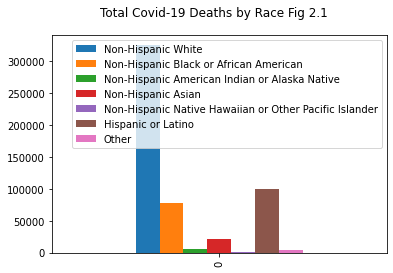

In [ ]:
# graph the total united states distribution by count as a bar graph 
Totalpop_df1.plot(kind="bar")
plt.suptitle('Total Covid-19 Deaths by Race Fig 2.1')

In [ ]:
# drop row one of the small us data frame to focus only on the % of deaths
Totalpop_df = Totalpop_df.drop(0)

# Percentage Racial distribution Weighted and Un-weighted of COVID-19 deaths in the United states
- x axis: Race
- y axis: Percentage distribution of COVID-19 deaths

##### 1= Distribution of COVID-19 deaths (%), 2= Unweighted distribution of population (%), 3= Weighted distribution of population (%)

Text(0.5, 0.98, '% of Covid-19 Deaths by Race Fig 2.2')

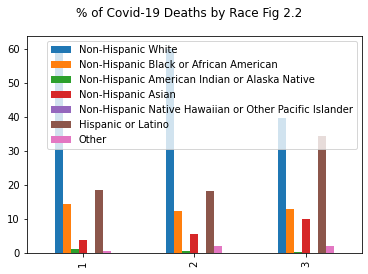

In [ ]:
Totalpop_df.plot(kind="bar") 
plt.suptitle('% of Covid-19 Deaths by Race Fig 2.2')

### Unweighted population percentages: 
- Based on the Single-Race Population Estimates from the U.S. Census Bureau, for the year 2019 (available from: https://wonder.cdc.gov/single-race-population.html). 

### Weighted population percentages: 
- Computed by multiplying county-level population counts by the count of COVID deaths for each county, summing to the state-level, and then estimating the percent of the population within each racial and ethnic group. 

These weighted population distributions therefore more accurately reflect the geographic locations where COVID outbreaks are occurring. 

# Summary of census data for perspective: 
- The percentage of Non-Hispanic White population in the US is 60.1% 
- The percentage of Non-Hispanic Black  population in the US is 13.4%
- The percentage of Non-Hispanic American Indian or Alaska Native population in the US is 1.3% 
- The percentage of Non-Hispanic Asian population in the US is 5.9%
- The percentage of Non-Hispanic Native Hawaiian or Other Pacific Islander population in the US is 0.2%
- The percentage of Hispanic or Latino  population in the US is 18.5%

source: https://www.census.gov/quickfacts/fact/table/US/PST045219

In [ ]:
# import the Census data including the racial distribution for the top 5 states for COVID-19 Deaths
CRFdf = pd.read_csv('Census_Race_Facts.csv')
CRFdf

,Fact,Florida,New Jersey,Texas,California,New York,United States
0,"White alone, not Hispanic or Latino, percent",53.2%,54.6%,41.2%,36.5%,55.3%,60.1%
1,"Black or African American alone, percent",16.9%,15.1%,12.9%,6.5%,17.6%,13.4%
2,"American Indian and Alaska Native alone, percent",0.5%,0.6%,1.0%,1.6%,1.0%,1.3%
3,"Asian alone, percent",3.0%,10.0%,5.2%,15.5%,9.0%,5.9%
4,Native Hawaiian and Other Pacific Islander alo...,0.1%,0.1%,0.1%,0.5%,0.1%,0.2%
5,"Two or More Races, percent",2.2%,2.3%,2.1%,4.0%,2.7%,2.8%
6,"Hispanic or Latino, percent",26.4%,20.9%,39.7%,39.4%,19.3%,18.5%


- Create small data frames of each of the top 5 states based on coronavirus deaths
- drop the count of covid 19 deaths and graph the % distribution of COVID-19 deaths, unweighted and weighted 

In [ ]:
NYdf = df_pop.loc[df_pop['State'] == 'New York']
NYdf

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other
132,New York,Count of COVID-19 deaths,16977.0,2778.0,54.0,730.0,NaN,2679.0,112.0
133,New York,Distribution of COVID-19 deaths (%),72.8,11.9,0.2,3.1,NaN,11.5,0.5
134,New York,Unweighted distribution of population (%),72.6,8.9,0.3,4.4,0.0,11.9,1.8
135,New York,Weighted distribution of population (%),63.9,10.7,0.2,6.3,0.0,17.2,1.6


# COVID-19 deaths in NY
- x axis: Race
- y axis: Percentage distribution of COVID-19 deaths

##### 133= Distribution of COVID-19 deaths (%), 134= Unweighted distribution of population (%), 135= Weighted distribution of population (%)

Text(0.5, 0.98, '% of Covid-19 Deaths by Race in New York Fig 2.3')

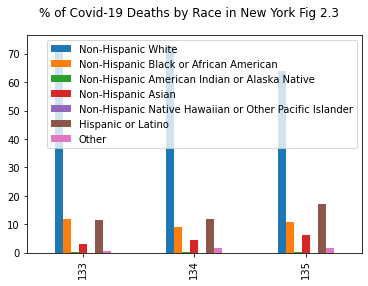

In [ ]:
del NYdf['State']
NYdf = NYdf.drop(132)
NYdf.plot(kind="bar") 
plt.suptitle('% of Covid-19 Deaths by Race in New York Fig 2.3')

In [ ]:
CAdf = df_pop.loc[df_pop['State'] == 'California']
CAdf 

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other
20,California,Count of COVID-19 deaths,19273.0,3721.0,279.0,7598.0,320.0,28578.0,470.0
21,California,Distribution of COVID-19 deaths (%),32.0,6.2,0.5,12.6,0.5,47.4,0.8
22,California,Unweighted distribution of population (%),36.5,5.6,0.4,14.9,0.4,39.4,2.8
23,California,Weighted distribution of population (%),28.8,7.2,0.2,14.7,0.3,46.4,2.3


# COVID-19 deaths in CA
- x axis: Race
- y axis: Percentage distribution of COVID-19 deaths

##### 21= Distribution of COVID-19 deaths (%), 22= Unweighted distribution of population (%), 23= Weighted distribution of population (%)

Text(0.5, 0.98, '% of Covid-19 Deaths by Race in California Fig 2.4')

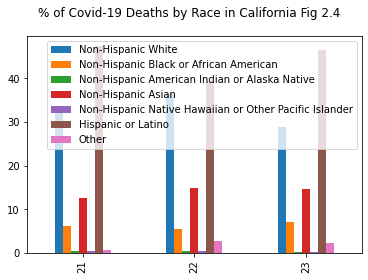

In [ ]:
del CAdf['State']
CAdf = CAdf.drop(20)
CAdf.plot(kind="bar")
plt.suptitle('% of Covid-19 Deaths by Race in California Fig 2.4')

In [ ]:
TXdf = df_pop.loc[df_pop['State'] == 'Texas']
TXdf

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other
180,Texas,Count of COVID-19 deaths,21201.0,5086.0,90.0,1049.0,29.0,22796.0,83.0
181,Texas,Distribution of COVID-19 deaths (%),42.1,10.1,0.2,2.1,0.1,45.3,0.2
182,Texas,Unweighted distribution of population (%),41.2,12.1,0.3,5.0,0.1,39.7,1.5
183,Texas,Weighted distribution of population (%),31.4,15.4,0.2,5.9,0.1,45.5,1.5


# COVID-19 deaths in TX
- x axis: Race
- y axis: Percentage distribution of COVID-19 deaths

##### 181= Distribution of COVID-19 deaths (%), 182= Unweighted distribution of population (%), 183= Weighted distribution of population (%)

Text(0.5, 0.98, '% of Covid-19 Deaths by Race in Texas Fig 2.5')

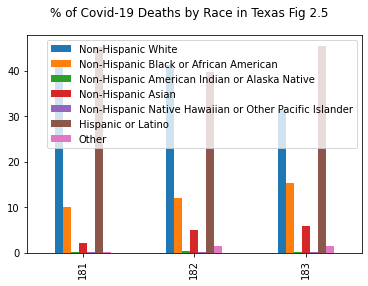

In [ ]:
del TXdf['State']
TXdf = TXdf.drop(180)
TXdf.plot(kind="bar")
plt.suptitle('% of Covid-19 Deaths by Race in Texas Fig 2.5')

In [ ]:
NJdf = df_pop.loc[df_pop['State'] == 'New Jersey']
NJdf 

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other
124,New Jersey,Count of COVID-19 deaths,12780.0,3647.0,16.0,1355.0,NaN,4594.0,83.0
125,New Jersey,Distribution of COVID-19 deaths (%),56.9,16.2,0.1,6.0,NaN,20.4,0.4
126,New Jersey,Unweighted distribution of population (%),54.6,12.9,0.1,9.8,0.0,20.9,1.6
127,New Jersey,Weighted distribution of population (%),50.5,14.1,0.1,11.4,0.0,22.4,1.5


# COVID-19 deaths in NJ
- x axis: Race
- y axis: Percentage distribution of COVID-19 deaths

##### 125= Distribution of COVID-19 deaths (%), 126= Unweighted distribution of population (%), 127= Weighted distribution of population (%)

Text(0.5, 0.98, '% of Covid-19 Deaths by Race in New Jersey Fig 2.6')

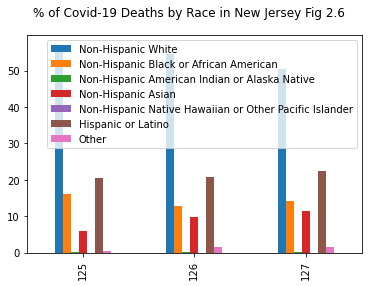

In [ ]:
del NJdf['State']
NJdf = NJdf.drop(124)
NJdf.plot(kind="bar")
plt.suptitle('% of Covid-19 Deaths by Race in New Jersey Fig 2.6') 

In [ ]:
FLdf = df_pop.loc[df_pop['State'] == 'Florida']
FLdf

,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Other
40,Florida,Count of COVID-19 deaths,17292.0,5202.0,45.0,452.0,11.0,7792.0,97.0
41,Florida,Distribution of COVID-19 deaths (%),56.0,16.8,0.1,1.5,0.0,25.2,0.3
42,Florida,Unweighted distribution of population (%),53.2,15.5,0.3,2.8,0.1,26.4,1.7
43,Florida,Weighted distribution of population (%),36.4,17.7,0.2,2.7,0.0,41.7,1.4


# COVID-19 deaths in FL
- x axis: Race
- y axis: Percentage distribution of COVID-19 deaths

##### 41= Distribution of COVID-19 deaths (%), 42= Unweighted distribution of population (%), 43= Weighted distribution of population (%)

Text(0.5, 0.98, '% of Covid-19 Deaths by Race in Florida Fig 2.7')

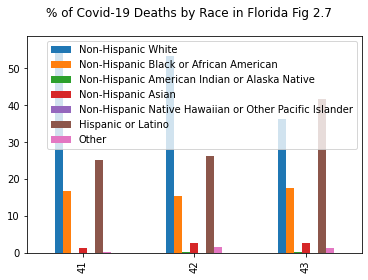

In [ ]:
del FLdf['State']
FLdf = FLdf.drop(40)
FLdf.plot(kind="bar")
plt.suptitle('% of Covid-19 Deaths by Race in Florida Fig 2.7') 

## Conclusion: The general trend from looking at % weighted distribution of population from the top 5 states aligns with the idea that there are differences in the burden of deaths due to COVID-19 according to race and ethnicity. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e794d5f9-53fc-46bf-a4db-d895c6568e4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>